In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px
# import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
# Чтение данных с помощью метода read_csv ()
games = pd.read_csv('vgsales.csv')
games.head(8)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales;
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26;
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01;
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02;


In [3]:
# Просмотр основного размера данных
games.shape

(16600, 11)

In [4]:
# Просмотр названий столбцов
games.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales;'],
      dtype='object')

In [5]:
# Изменение названия столбцов
games.rename(columns = {"Global_Sales;": "Global_sales"}, inplace = True) 
games.rename(columns = {"NA_Sales": "Sales_North_America"}, inplace = True) 
games.rename(columns = {"EU_Sales": "Sales_Europe"}, inplace = True) 
games.rename(columns = {"JP_Sales": "Sales_Japan"}, inplace = True) 
games.rename(columns = {"Other_Sales": "Other_sales"}, inplace = True)
games.sample(5) # случайное количество записей

,Rank,Name,Platform,Year,Genre,Publisher,Sales_North_America,Sales_Europe,Sales_Japan,Other_sales,Global_sales
13417,13418,Bleach: Soul Carnival,PSP,2008.0,Fighting,Sony Computer Entertainment,0.00,0.00,0.05,0.00,0.05;
12128,12129,Build-A-Bear Workshop: Friendship Valley,Wii,NaN,Misc,Unknown,0.06,0.00,0.00,0.00,0.07;
3933,3935,Rory McIlroy PGA Tour,PS4,2015.0,Action,Electronic Arts,0.18,0.24,0.00,0.08,0.51;
10954,10956,The Idolmaster: Platinum Stars,PS4,2016.0,Simulation,Namco Bandai Games,0.00,0.00,0.09,0.00,0.09;
6953,6955,New Carnival Games,DS,2010.0,Misc,Take-Two Interactive,0.16,0.05,0.00,0.02,0.23;


In [6]:
# Проверка повторяющихся строк (дубликатов)
games.duplicated().any()

True

In [7]:
# Удаление дубликатов и обновление фрейма данных
games.drop_duplicates(inplace=True)
games.duplicated().any()

False

In [8]:
# Общая информация о наборе данных и атрибутах
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16599
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 16598 non-null  object 
 1   Name                 16475 non-null  object 
 2   Platform             16475 non-null  object 
 3   Year                 16206 non-null  float64
 4   Genre                16475 non-null  object 
 5   Publisher            16418 non-null  object 
 6   Sales_North_America  16475 non-null  float64
 7   Sales_Europe         16475 non-null  float64
 8   Sales_Japan          16475 non-null  float64
 9   Other_sales          16475 non-null  float64
 10  Global_sales         16475 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


In [9]:
# Смотрим, какие стобцы имеют недостающие занчения (NaN)
games.isna().any()
# видим, что все столбцы, кроме Rank, имеют недостающие значения

Rank                   False
Name                    True
Platform                True
Year                    True
Genre                   True
Publisher               True
Sales_North_America     True
Sales_Europe            True
Sales_Japan             True
Other_sales             True
Global_sales            True
dtype: bool

In [10]:
# Нам нужно знать, сколько значений отсутствует. Показываем процентные значения функций с пропущенными значениями.
(games.isna().sum() * 100) / games.shape[0]
# Мы видим, что в Year фактически отсутствует 2,36% значений. И у Publisher отсутствует 1,08% значений.

Rank                   0.000000
Name                   0.741053
Platform               0.741053
Year                   2.361730
Genre                  0.741053
Publisher              1.084468
Sales_North_America    0.741053
Sales_Europe           0.741053
Sales_Japan            0.741053
Other_sales            0.741053
Global_sales           0.741053
dtype: float64

In [11]:
# Удалаяем отсутствующие значения
games = games.dropna (subset = ['Year', 'Publisher', 'Genre', 'Sales_North_America', 'Sales_Europe', 'Sales_Japan', 'Other_sales', 'Global_sales', 'Name'], how = 'any')
 # how = 'any' удалить любое отсутствующее значение в любом заданном столбце,
 # how = 'all' Если во всех указанных столбцах отсутствуют значения, удалите их.
games.isna().any()


Rank                   False
Name                   False
Platform               False
Year                   False
Genre                  False
Publisher              False
Sales_North_America    False
Sales_Europe           False
Sales_Japan            False
Other_sales            False
Global_sales           False
dtype: bool

In [12]:
# Повторно обновить серийный номер, чтобы серийный номер был изменен на значение индекса от 0 до N по порядку
games=games.reset_index(drop=True)
games.head(607)

,Rank,Name,Platform,Year,Genre,Publisher,Sales_North_America,Sales_Europe,Sales_Japan,Other_sales,Global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;
...,...,...,...,...,...,...,...,...,...,...,...
602,607,Madden NFL 09,X360,2008.0,Sports,Electronic Arts,2.21,0.12,0.00,0.20,2.54;
603,609,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,0.22,2.52;
604,610,Perfect Dark,N64,2000.0,Action,Nintendo,1.55,0.75,0.16,0.06,2.52;
605,611,Game Party,Wii,2007.0,Misc,Midway Games,1.50,0.78,0.00,0.24,2.52;


In [13]:
# Изменение типа данных колонки Year 
games.Year = games.Year.astype('int16')
games.head(180)

,Rank,Name,Platform,Year,Genre,Publisher,Sales_North_America,Sales_Europe,Sales_Japan,Other_sales,Global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;
...,...,...,...,...,...,...,...,...,...,...,...
175,176,Donkey Kong 64,N64,1999,Platform,Nintendo,3.33,0.79,1.09,0.06,5.27;
176,177,Assassin's Creed II,X360,2009,Action,Ubisoft,3.10,1.56,0.08,0.51,5.27;
177,178,Professor Layton and the Curious Village,DS,2007,Puzzle,Nintendo,1.22,2.48,1.03,0.52,5.26;
178,179,Tomb Raider II,PS,1997,Action,Eidos Interactive,2.30,2.46,0.20,0.28,5.24;


In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16171 entries, 0 to 16170
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 16171 non-null  object 
 1   Name                 16171 non-null  object 
 2   Platform             16171 non-null  object 
 3   Year                 16171 non-null  int16  
 4   Genre                16171 non-null  object 
 5   Publisher            16171 non-null  object 
 6   Sales_North_America  16171 non-null  float64
 7   Sales_Europe         16171 non-null  float64
 8   Sales_Japan          16171 non-null  float64
 9   Other_sales          16171 non-null  float64
 10  Global_sales         16171 non-null  object 
dtypes: float64(4), int16(1), object(6)
memory usage: 1.3+ MB


In [15]:
# Удаление лишнего знака в колонке Global_sales
chars_to_remove = [';']

# columns from where to remove special characters
cols_to_clean = ['Global_sales']

for col in cols_to_clean:
    for char in chars_to_remove:
        
        games[col] = games[col].apply(lambda x: x.replace(char, ''))
        

games.head(180)

,Rank,Name,Platform,Year,Genre,Publisher,Sales_North_America,Sales_Europe,Sales_Japan,Other_sales,Global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
175,176,Donkey Kong 64,N64,1999,Platform,Nintendo,3.33,0.79,1.09,0.06,5.27
176,177,Assassin's Creed II,X360,2009,Action,Ubisoft,3.10,1.56,0.08,0.51,5.27
177,178,Professor Layton and the Curious Village,DS,2007,Puzzle,Nintendo,1.22,2.48,1.03,0.52,5.26
178,179,Tomb Raider II,PS,1997,Action,Eidos Interactive,2.30,2.46,0.20,0.28,5.24


In [16]:
# Изменение типа данных колонки Global_sales 
games.Global_sales = games.Global_sales.astype('float64')
games.head(300)     

,Rank,Name,Platform,Year,Genre,Publisher,Sales_North_America,Sales_Europe,Sales_Japan,Other_sales,Global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
295,297,Star Fox 64,N64,1997,Shooter,Nintendo,2.78,0.58,0.64,0.04,4.03
296,298,Minecraft,PS4,2014,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
297,299,Golf,NES,1984,Sports,Nintendo,1.22,0.28,2.46,0.04,4.01
298,300,Fallout 3,PS3,2008,Role-Playing,Bethesda Softworks,2.15,1.20,0.07,0.59,4.01


In [17]:
games['Platform'] = games['Platform'].astype('category')
games['Publisher'] = games['Publisher'].astype('category')
games['Genre'] = games['Genre'].astype('category')
games.dtypes

Rank                     object
Name                     object
Platform               category
Year                      int16
Genre                  category
Publisher              category
Sales_North_America     float64
Sales_Europe            float64
Sales_Japan             float64
Other_sales             float64
Global_sales            float64
dtype: object

In [18]:
# Просмотр основного размера данных
games.shape

(16171, 11)

In [19]:
# 3.ОБРАБОТКА ВЫБРОСОВ
games.describe ()

,Year,Sales_North_America,Sales_Europe,Sales_Japan,Other_sales,Global_sales
count,16171.000000,16171.000000,16171.000000,16171.000000,16171.000000,16171.000000
mean,2005.908602,0.266727,0.148426,0.079070,0.048643,0.543141
std,44.858439,0.825270,0.511028,0.312767,0.190748,1.572712
min,-2006.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [20]:
# Условия запроса
querySer = games.loc [:, 'Year']> 0 # Выбрать все строки, столбец «Year» больше 0
 # Применить условия запроса
print ('Перед удалением выбросов:', games.shape)
games=games.loc[querySer,:]
print ('После удаления выбросов:', games.shape)

Перед удалением выбросов: (16171, 11)
После удаления выбросов: (16169, 11)


In [21]:
# Условия запроса
querySer = games.loc [:, 'Year']> 1999 # Выбрать все строки, столбец «Year» больше 1999
 #Применить условия запроса
print ('Перед удалением выбросов:', games.shape)
games=games.loc[querySer,:]
print ('После удаления выбросов:', games.shape)

Перед удалением выбросов: (16169, 11)
После удаления выбросов: (14200, 11)


In [22]:
# Условия запроса
querySer = games.loc [:, 'Sales_Japan']> 0 # Выбрать все строки, столбец «Sales_Japan» больше 0
 # Применить условия запроса
print ('Перед удалением выбросов:', games.shape)
games=games.loc[querySer,:]
print ('После удаления выбросов:', games.shape)

Перед удалением выбросов: (14200, 11)
После удаления выбросов: (4992, 11)


In [23]:
# 4. КЛАССИФИКАЦИЯ 

In [24]:
X = games.iloc[:, 6].values
y = games.iloc[:, 7].values

# train test split and split the dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [25]:
# преобразetv данные в длинные 2D-массивы с 1 столбцом и необходимым количеством строк
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

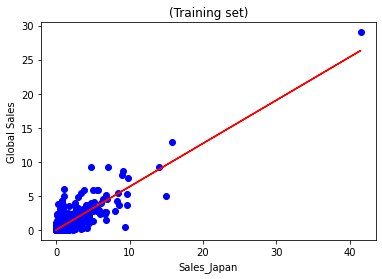

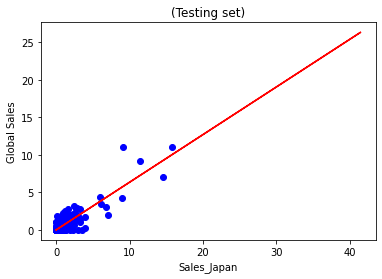

Training set score: 0.77
Test set score: 0.78


In [26]:
# Создадим функцию для построения графика
def plot_regression(classifier):

    plt.scatter(X_train, y_train,color='blue')
    plt.plot(X_train, classifier.predict(X_train), color='red')
    plt.title('(Training set)')
    plt.xlabel('Sales_Japan')
    plt.ylabel('Global Sales')
    plt.show()

    plt.scatter(X_test, y_test,color='blue')
    plt.plot(X_train, classifier.predict(X_train), color='red')
    plt.title('(Testing set)')
    plt.xlabel('Sales_Japan')
    plt.ylabel('Global Sales')
    plt.show()
    
plot_regression(lin_reg)
print("Training set score: {:.2f}".format(lin_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lin_reg.score(X_test, y_test)))

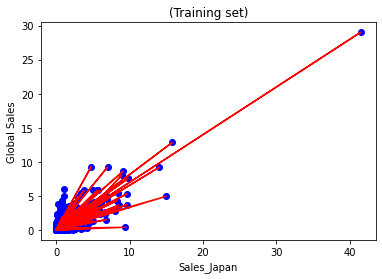

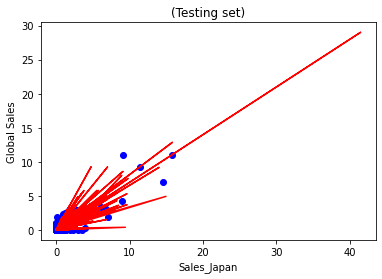

Training set score: 0.91
Test set score: 0.61


In [27]:
# Decision tree regressor (дерево решений)
DTree_regressor = DecisionTreeRegressor(random_state=5)
DTree_regressor.fit(X_train, y_train)
plot_regression(DTree_regressor)

print("Training set score: {:.2f}".format(DTree_regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(DTree_regressor.score(X_test, y_test)))

<ipython-input-28-c074b7b922fd>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



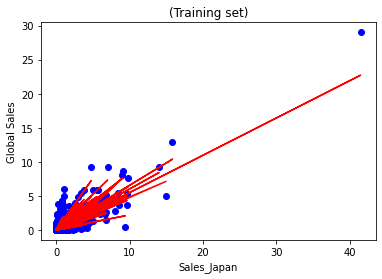

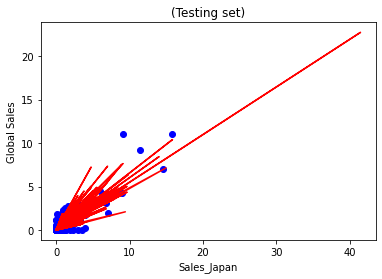

Training set score: 0.87
Test set score: 0.70


In [28]:
# Random Forest regressor algorithm (случайный лес)
RF_regressor = RandomForestRegressor(n_estimators=300, random_state=5)
RF_regressor.fit(X_train, y_train)
plot_regression(RF_regressor)

print("Training set score: {:.2f}".format(RF_regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RF_regressor.score(X_test, y_test)))

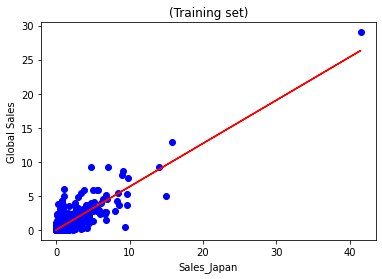

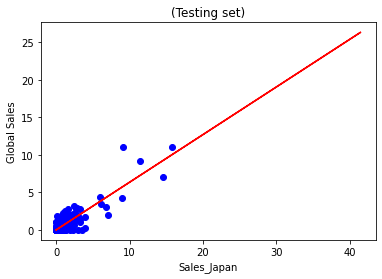

Training set score: 0.77
Test set score: 0.78


In [29]:
components = [
    ('scaling', StandardScaler()),
    ('PCA', PCA()),
    ('regression', LinearRegression())
]

pca = Pipeline(components)
pca.fit(X_train, y_train)
plot_regression(pca)
print("Training set score: {:.2f}".format(pca.score(X_train, y_train)))
print("Test set score: {:.2f}".format(pca.score(X_test, y_test)))

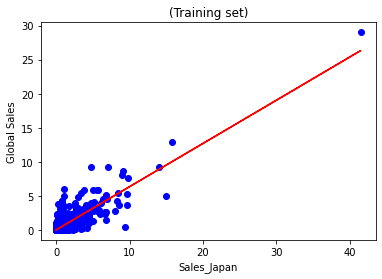

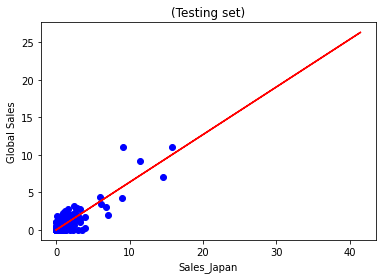

Training set score: 0.77
Test set score: 0.78


In [30]:
#  Ridge regression (Регрессия хребта)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
plot_regression(ridge_reg)
print("Training set score: {:.2f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_reg.score(X_test, y_test)))

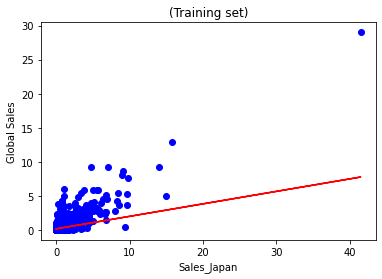

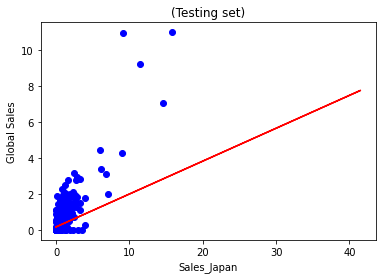

Training set score: 0.38
Test set score: 0.38


In [31]:
# ElasticNet
elastic = ElasticNet()
elastic.fit(X_train, y_train)
plot_regression(elastic)
print("Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))

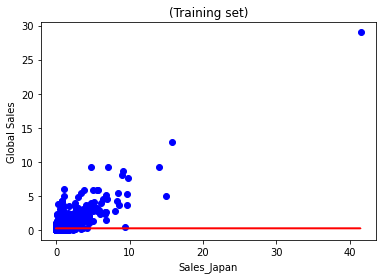

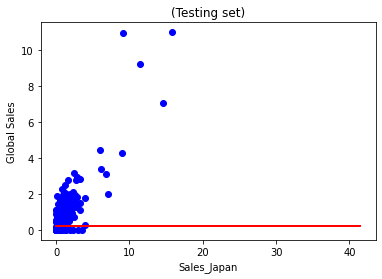

Training set score: 0.00
Test set score: -0.00


In [32]:
# Lasso regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
plot_regression(lasso_reg)
print("Training set score: {:.2f}".format(lasso_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_reg.score(X_test, y_test)))

In [35]:
# 6.Визуализация

In [36]:
 #Поскольку я работаю только с регионом Японии, я отброшу все ненужные столбцы, которые я не собираюсь использовать.
games=games.drop(['Sales_North_America', 'Sales_Europe', 'Other_sales', 'Global_sales'],axis=1)
games

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
0,1,Wii Sports,Wii,2006,Sports,Nintendo,3.77
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.79
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,3.28
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
7,8,Wii Play,Wii,2006,Misc,Nintendo,2.93
...,...,...,...,...,...,...,...
16148,16578,Neo Angelique Special,PSP,2008,Adventure,Tecmo Koei,0.01
16153,16583,Real Rode,PS2,2008,Adventure,Kadokawa Shoten,0.01
16160,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.01
16162,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.01


In [37]:
# Просмотр основного размера данных
games.shape

(4992, 7)

In [38]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [39]:
# график 20 самых продаваемых видеоигр¶
games_order=games.sort_values("Sales_Japan",ascending=False)
games_order

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.04
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.65
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,5.38
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,5.33
...,...,...,...,...,...,...,...
2398,2439,Army of Two: The 40th Day,PS3,2010,Shooter,Electronic Arts,0.01
2389,2430,Skate 2,PS3,2009,Sports,Electronic Arts,0.01
2375,2414,Darksiders II,PS3,2012,Action,THQ,0.01
2354,2392,Beijing 2008,PS3,2008,Sports,Sega,0.01


In [40]:
games_20=games_order.head(20)
games_20

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.04
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.65
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,5.38
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,5.33
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,5.32
213,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,4.87
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,4.70
73,74,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,4.36
149,150,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009,Role-Playing,Nintendo,4.35


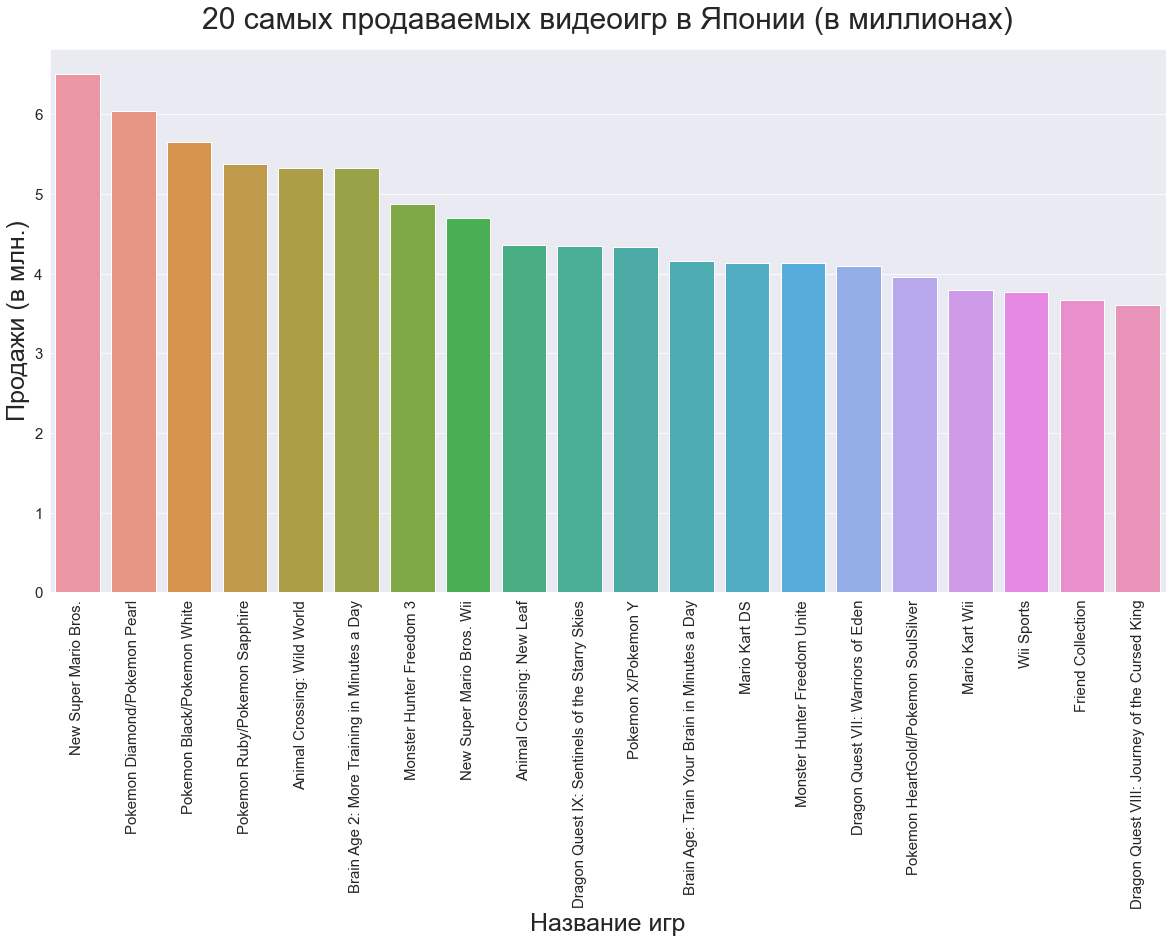

In [41]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Name',  y ='Sales_Japan', data = games_20);
plt.title("20 самых продаваемых видеоигр в Японии (в миллионах)",fontsize=30,pad=20);
plt.xlabel('Название игр',fontsize=25)
plt.ylabel('Продажи (в млн.)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)

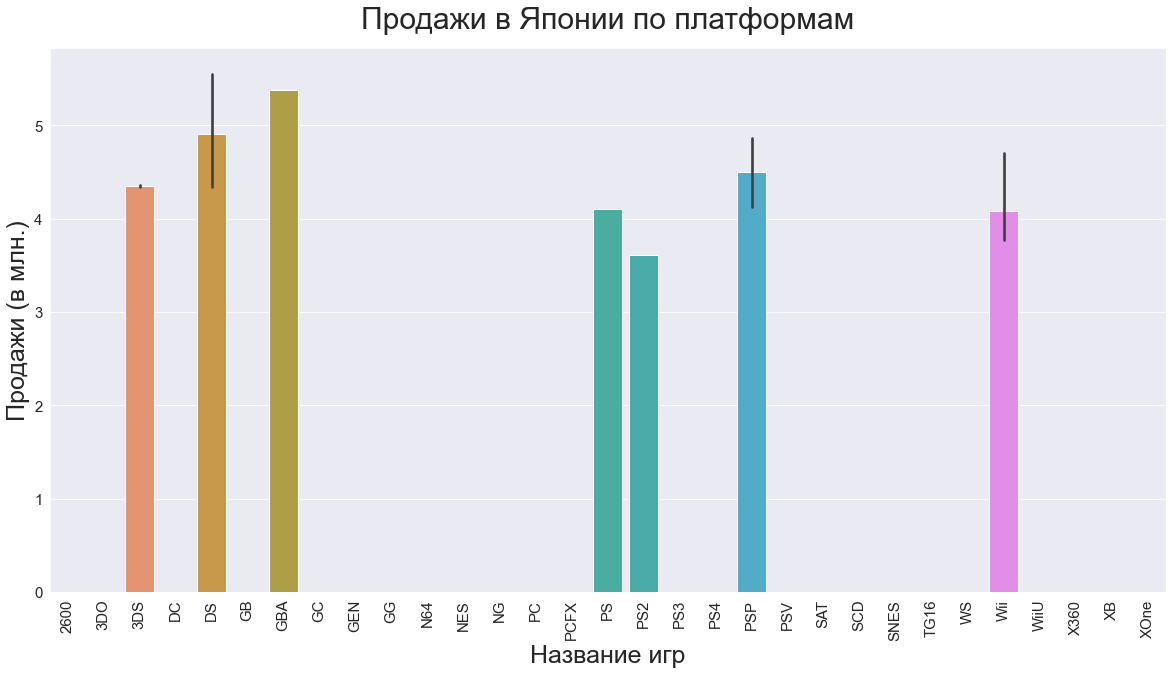

In [42]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Platform',  y ='Sales_Japan', data = games_20);
plt.title("Продажи в Японии по платформам",fontsize=30,pad=20);
plt.xlabel('Название игр',fontsize=25)
plt.ylabel('Продажи (в млн.)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)

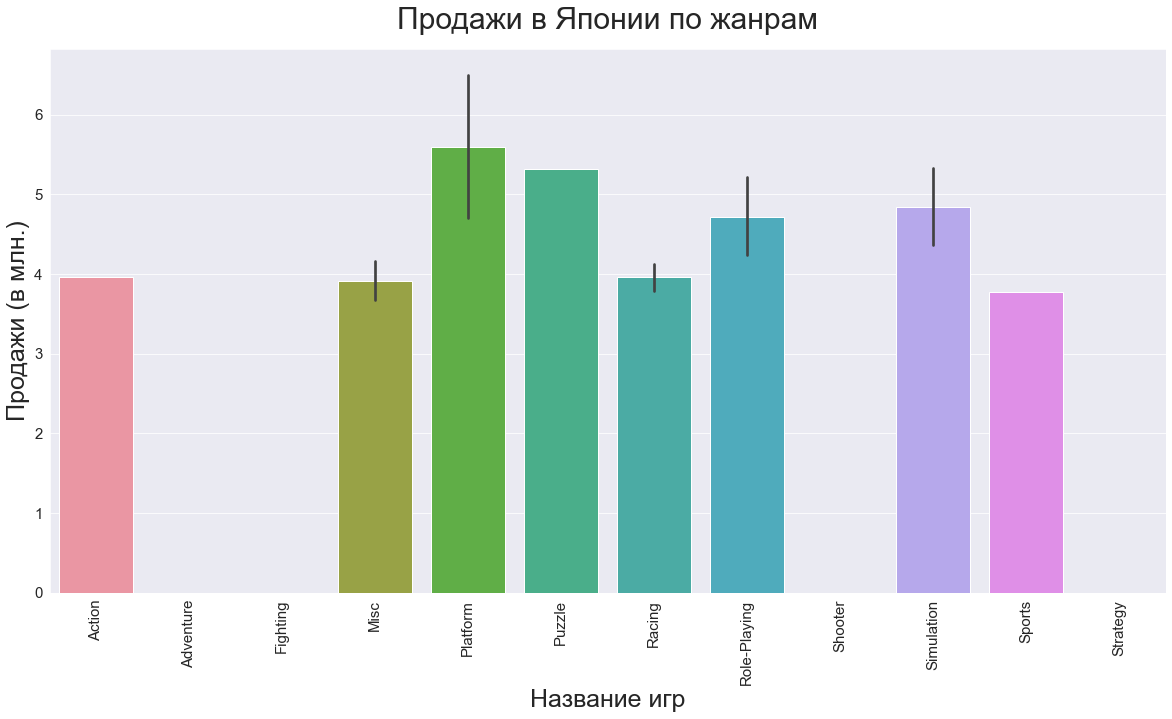

In [43]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Genre',  y ='Sales_Japan', data = games_20);
plt.title("Продажи в Японии по жанрам",fontsize=30,pad=20);
plt.xlabel('Название игр',fontsize=25)
plt.ylabel('Продажи (в млн.)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)

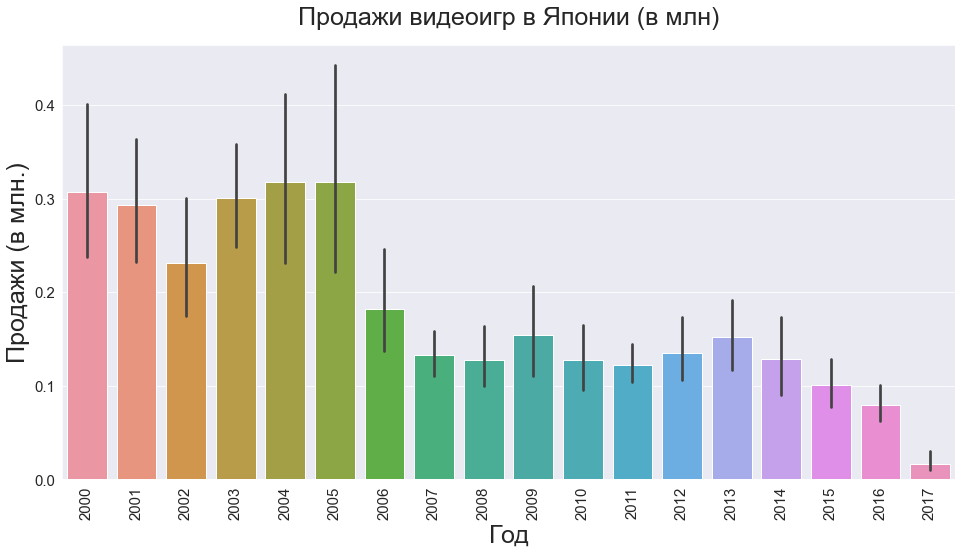

In [44]:
# график продаж за каждый год
plt.figure(figsize=(16,8))
sns.barplot(x = 'Year',  y ='Sales_Japan', data = games);
plt.title("Продажи видеоигр в Японии (в млн)",fontsize=25,pad=20);
plt.xlabel('Год',fontsize=25)
plt.ylabel('Продажи (в млн.)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)

In [45]:
# график 20 самых наименее продаваемых видеоигр в Японии
games_order=games.sort_values("Sales_Japan",ascending=True)
games_order

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
16163,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.01
7870,8061,Let's TAP,Wii,2008,Misc,Sega,0.01
784,796,NBA 2K11,X360,2010,Action,Take-Two Interactive,0.01
15710,16114,Last Escort: Club Katze,PS2,2010,Adventure,D3Publisher,0.01
7830,8019,The Walking Dead: Season One,PSV,2013,Adventure,Square Enix,0.01
...,...,...,...,...,...,...,...
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,5.33
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,5.38
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.65
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.04


In [46]:
games_least_20=games_order.head(20)
games_least_20

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
16163,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.01
7870,8061,Let's TAP,Wii,2008,Misc,Sega,0.01
784,796,NBA 2K11,X360,2010,Action,Take-Two Interactive,0.01
15710,16114,Last Escort: Club Katze,PS2,2010,Adventure,D3Publisher,0.01
7830,8019,The Walking Dead: Season One,PSV,2013,Adventure,Square Enix,0.01
15709,16113,DoDonPachi Saidaioujou,X360,2013,Shooter,Cave,0.01
7791,7980,Tekken Tag Tournament 2,WiiU,2012,Fighting,Namco Bandai Games,0.01
15707,16111,Nodame Cantabile,PS2,2007,Misc,Banpresto,0.01
15706,16110,Marginal #4: Idol of Supernova,PSV,2014,Adventure,Idea Factory,0.01
7874,8065,LEGO Marvel's Avengers,3DS,2016,Action,Warner Bros. Interactive Entertainment,0.01


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



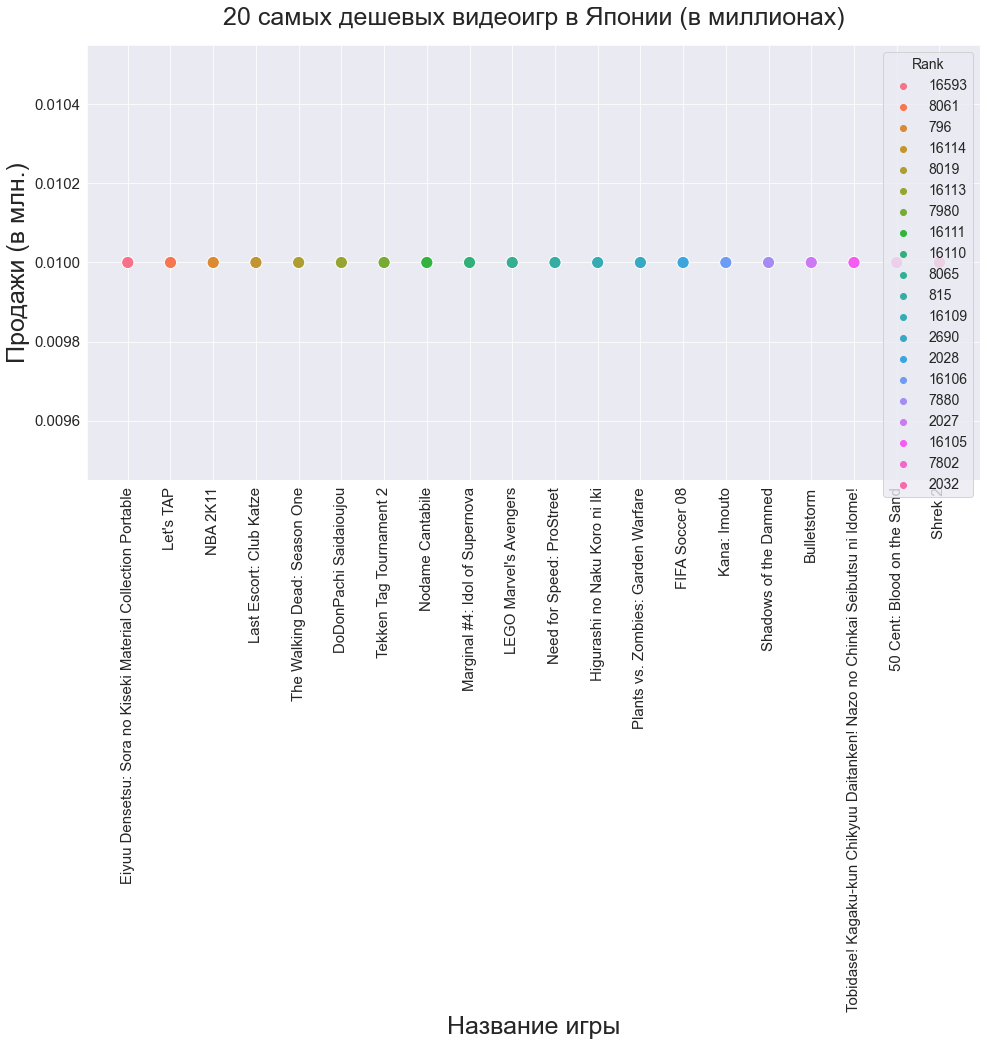

In [47]:
plt.figure(figsize=(16,8))
plt.title("20 самых дешевых видеоигр в Японии (в миллионах)",fontsize=25,pad=20);
plt.xlabel('Название игры',fontsize=25)
plt.ylabel('Продажи (в млн.)',fontsize=25)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
sns.scatterplot(games_least_20.Name,games_least_20.Sales_Japan,hue=games_least_20.Rank,s=150,data=games_least_20);


In [48]:
# 7.ОТВЕТЫ НА ВОПРОСЫ

In [49]:
# Вопрос: Сколько приключенческих игр присутствует в нашем наборе данных?

Adventure_Genre_df=games.query('Genre =="Adventure"')
Adventure_Genre_df

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
158,159,Assassin's Creed,X360,2007,Adventure,Ubisoft,0.07
217,219,Assassin's Creed,PS3,2007,Adventure,Ubisoft,0.09
415,418,L.A. Noire,PS3,2011,Adventure,Take-Two Interactive,0.12
444,448,Heavy Rain,PS3,2010,Adventure,Sony Computer Entertainment,0.06
545,550,L.A. Noire,X360,2011,Adventure,Take-Two Interactive,0.02
...,...,...,...,...,...,...,...
16135,16564,Kanokon: Esuii,PS2,2008,Adventure,5pb,0.01
16144,16574,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,Prototype,0.01
16145,16575,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,Kadokawa Shoten,0.01
16148,16578,Neo Angelique Special,PSP,2008,Adventure,Tecmo Koei,0.01


In [55]:
# Ответ: Всего в нашем наборе данных 660 приключенческих игр.

In [56]:
# Вопрос: Сколько игр опубликовала Nintendo?

Nintendo_df=games.query('Publisher=="Nintendo"')
Nintendo_df

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
0,1,Wii Sports,Wii,2006,Sports,Nintendo,3.77
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.79
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,3.28
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
7,8,Wii Play,Wii,2006,Misc,Nintendo,2.93
...,...,...,...,...,...,...,...
15860,16272,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.01
15946,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.01
16037,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.01
16053,16476,Captain Rainbow,Wii,2008,Adventure,Nintendo,0.01


In [57]:
# Nintendo опубликовала около 462 игр.

In [58]:
# Вопрос: Сколько игр было опубликовано в 2015 году?
year_df=games.query('Year == 2015')
year_df


,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,0.35
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,0.06
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,0.22
101,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,0.01
109,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,0.24
...,...,...,...,...,...,...,...
16037,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.01
16076,16502,Irotoridori no Sekai: World's End Re-Birth,PSV,2015,Action,HuneX,0.01
16104,16531,Kiniro no Corda 3,3DS,2015,Adventure,Tecmo Koei,0.01
16118,16545,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.01


In [59]:
# Ответ: В 2015 году опубликовано 327 игр

In [60]:
# Вопрос: Какая игра имеет самые высокие продажи в Японии?

highest_game_sales_df=games.sort_values("Sales_Japan",ascending=False)
highest_game_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,6.50
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.04
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.65
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,5.38
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,5.33
...,...,...,...,...,...,...,...
2398,2439,Army of Two: The 40th Day,PS3,2010,Shooter,Electronic Arts,0.01
2389,2430,Skate 2,PS3,2009,Sports,Electronic Arts,0.01
2375,2414,Darksiders II,PS3,2012,Action,THQ,0.01
2354,2392,Beijing 2008,PS3,2008,Sports,Sega,0.01


In [61]:
# Ответ: New Super Mario Bros. имеет самые высокие продажи в Японии - более 6,50 миллиона продаж

In [62]:
# Вопрос: Сколько игр-стрелялок было опубликовано в 2015 году ?

year_df=games.query('Year == 2015')
year_df

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,0.35
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,0.06
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,0.22
101,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,0.01
109,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,0.24
...,...,...,...,...,...,...,...
16037,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.01
16076,16502,Irotoridori no Sekai: World's End Re-Birth,PSV,2015,Action,HuneX,0.01
16104,16531,Kiniro no Corda 3,3DS,2015,Adventure,Tecmo Koei,0.01
16118,16545,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.01


In [63]:
genre_df=games.query('Genre =="Shooter"')
genre_df

,Rank,Name,Platform,Year,Genre,Publisher,Sales_Japan
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,0.13
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,0.11
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,0.35
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,0.65
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,0.07
...,...,...,...,...,...,...,...
15789,16195,Metal Slug Anthology,PS2,2007,Shooter,Ignition Entertainment,0.01
15800,16208,Caladrius,X360,2013,Shooter,Moss,0.01
15854,16266,Mamoru-kun wa Norowarete Shimatta!,X360,2009,Shooter,G.Rev,0.01
16022,16443,Bullet Soul: Tama Tamashii,X360,2011,Shooter,5pb,0.01


In [64]:
genre_df.shape

(307, 7)

In [66]:
# Ответ: В 2015 году было опубликовано 307 игры-стрелялки.